In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:

from sklearn.model_selection import train_test_split
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import SVC
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
# Menampilkan skor akurasi prediksi
akurasi = clf.score(X_test, y_test)

In [ ]:
akurasi

0.7636363636363637

**VISUALISASI**

In [ ]:
# Untuk visualisasi, kita ambil dua fitur pertama saja agar bisa diplot (misal kolom 0 dan 1)
X_vis = X[:, :2]

# Pisahkan ulang train-test untuk visualisasi 2D
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.33, random_state=42
)


In [ ]:
import numpy as np
# Latih ulang model untuk dua fitur
clf_vis = SVC(kernel='linear')
clf_vis.fit(X_train_vis, y_train_vis)

# Buat grid area untuk decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

In [ ]:
Z = clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

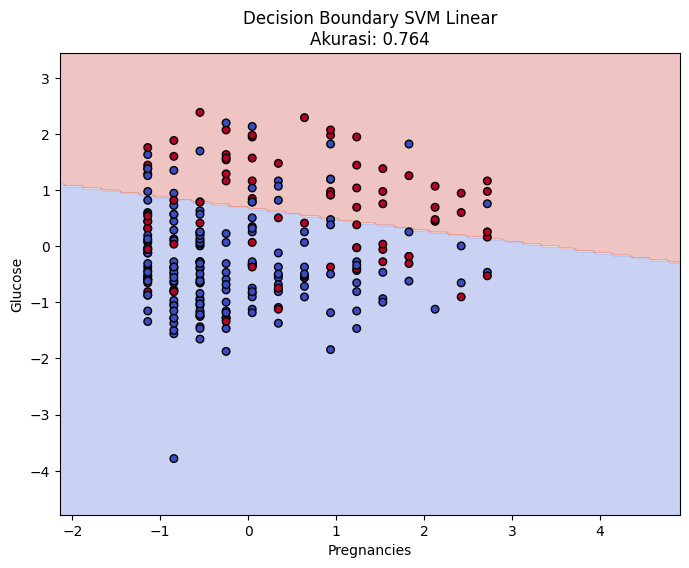

In [ ]:
import matplotlib.pyplot as plt
# Plot hasil decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title(f"Decision Boundary SVM Linear\nAkurasi: {akurasi:.3f}")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

Hasil Prediksi menggunakan **Tuning Hyperparameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Pencarian parameter terbaik dengan 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Train Accuracy:", grid.best_score_)
print("Test Accuracy:", grid.best_estimator_.score(X_test, y_test))


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Train Accuracy: 0.8164179104477611
Test Accuracy: 0.7727272727272727


Hasil Prediksi menggunakan **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

clf = SVC(C=100, gamma=0.001, kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       170
           1       0.73      0.71      0.72       160

    accuracy                           0.73       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.73      0.73      0.73       330



## **KESIMPULAN**

Setelah dilakukan penyeimbangan data menggunakan SMOTE (Synthetic Minority Oversampling Technique), model SVM diuji kembali pada data uji yang telah seimbang. Hasil evaluasi menunjukkan akurasi sebesar 73,33%, dengan nilai precision sebesar 0.73, recall sebesar 0.73, dan f1-score sebesar 0.73 untuk kedua kelas. Nilai yang relatif seimbang antara precision dan recall pada masing-masing kelas menunjukkan bahwa model mampu mengenali data positif dan negatif dengan proporsi yang hampir sama, sehingga masalah ketidakseimbangan kelas pada model sebelumnya berhasil dikurangi.

Meskipun akurasi keseluruhan tidak meningkat secara signifikan, penerapan SMOTE membuat performa model menjadi lebih adil dan stabil terhadap kedua kelas. Dengan demikian, kombinasi antara tuning hyperparameter dan SMOTE berhasil meningkatkan keseimbangan prediksi model SVM dalam klasifikasi diabetes, meskipun tidak sepenuhnya menaikkan akurasi total hingga 90%.